In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [186]:
#read data with pandas library
data= pd.read_excel("dataset.xlsx", sheet_name=0, engine='openpyxl')
data.head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


In [187]:
#First 3 samples of the our dataset:
data.drop(['Name'], 1, inplace=True)
data.dropna(inplace=True)
data.head(3)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


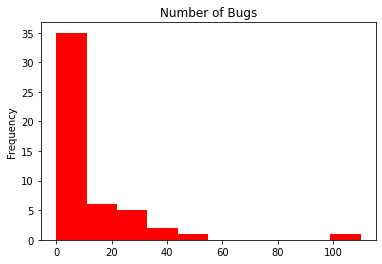

In [188]:
#show the distribution of 3 metrics
def plotHist(columnIndex,columnName,colorName):
    data[columnIndex].plot(kind="hist",color=colorName)
    plt.title(columnName)
    #write your code here
plotHist("NOB","Number of Bugs","r")

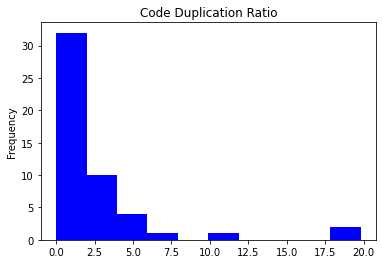

In [189]:
plotHist("CDR","Code Duplication Ratio","b")

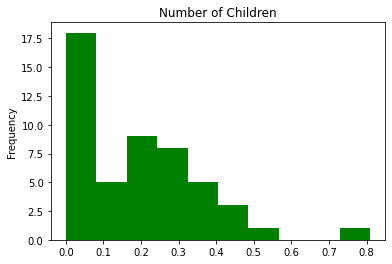

In [190]:
plotHist("NOC","Number of Children","g")

In [191]:
#Min max scaler for all data
new_data=data.apply(lambda x:(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))

In [192]:
new_data

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [235]:
#Show the correlation matrix of all metrics
new_data.corr(method="spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [194]:
#P values of Spearman Correlation Table
#write your code here
a=scipy.stats.spearmanr(new_data)[1]
b=pd.DataFrame(a)
b.rename(columns={0:"NOB",1:"V",2:"SH",3:"CS",4:"CDR",5:"TD",6:"NOC",7:"CBO",8:"RFC",9:"LOC",10:"CLOC",11:"FanIn",12:"FanOut",13:"LCOM",14:"WMC",15:"DIT"},inplace=True)
b.rename(index={0:"NOB",1:"V",2:"SH",3:"CS",4:"CDR",5:"TD",6:"NOC",7:"CBO",8:"RFC",9:"LOC",10:"CLOC",11:"FanIn",12:"FanOut",13:"LCOM",14:"WMC",15:"DIT"},inplace=True)
round(b,4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


<AxesSubplot:>

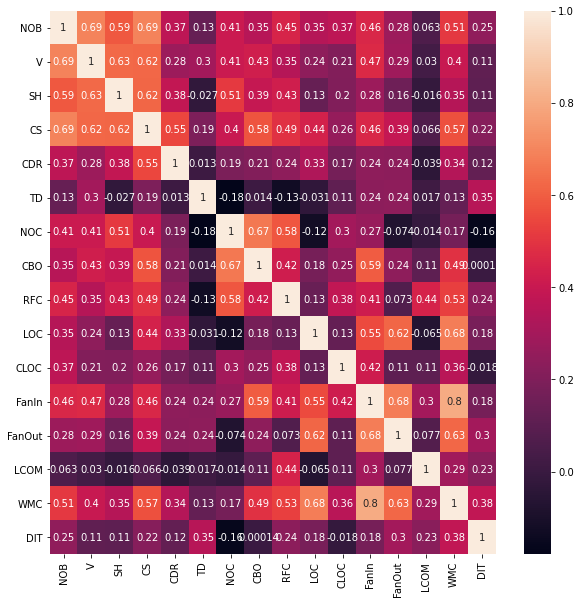

In [195]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(10,10)) 
sns.heatmap(new_data.iloc[:,:].corr(method="spearman"), annot=True)

In [196]:
#Correlation between External Metrics & TD
external=["NOB","V","SH","CS"]
TD=["CDR","TD"]
internal=["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]
new_data.corr(method="spearman").filter(external).drop(external).drop(internal)

,NOB,V,SH,CS
CDR,0.373251,0.280358,0.384657,0.548113
TD,0.133383,0.296757,-0.026546,0.194611


In [197]:
#Correlation between Internal Metrics & TD
new_data.corr(method="spearman").filter(internal).drop(internal).drop(external)

,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.12333
TD,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.35201


In [198]:
data_external=new_data.iloc[:,:4]
data_internal=new_data.iloc[:,6:]
data_TD=new_data.iloc[:,4:6]
data_internal_and_external=new_data.drop(["TD","CDR"],1)

# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName,cdr_or_td):
  #Plot the Scatter Graph to see results better
    plt.scatter(y_test,y_test,c="b",label="Predicted Values")
    plt.scatter(y_test,y_pred,c="r",label="Original Values")
    plt.legend()
    plt.title("{} - Accuracy of {}".format(cdr_or_td,regressorName))
    plt.show()
#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test,cdr_or_td):
  # Create the regressor: reg_all
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Linear Regression",cdr_or_td)

#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test,cdr_or_td):
    lsvr = SVR(kernel='rbf')
    model=lsvr.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Support Vector Regression-rbf",cdr_or_td)
    
    lsvr=SVR(kernel='linear')
    model=lsvr.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Support Vector Regression-linear",cdr_or_td)

def decisionTreeRegression(X_train,y_train,X_test,y_test,cdr_or_td):
    dctr=DecisionTreeRegressor(random_state=53)
    dctr.fit(X_train,y_train)
    y_pred=dctr.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Decision Tree Regression",cdr_or_td)

def randomDecTreeRegression(X_train,y_train,X_test,y_test,cdr_or_td):
    forest=RandomForestRegressor(random_state = 53)
    forest.fit(X_train,y_train.ravel())
    y_pred=forest.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Random Forest Tree Regression",cdr_or_td)

#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test,cdr_or_td):
    mr=MLPRegressor(random_state=53)
    mr.fit(X_train,y_train.ravel())
    y_pred=mr.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    print("R-Squared Value = {}    Root Mean Squared Error = {}".format(r2,rmse))
    plotGraph(y_test,y_pred,"Multi-layer Perceptron Regressor",cdr_or_td)

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [201]:
#split data into train and test data
y1 = new_data["TD"].values.reshape((-1,1))
y2=new_data["CDR"].values.reshape((-1,1))
X = data_internal.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state = 53)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state = 53)

R-Squared Value = -0.1729675304692071    Root Mean Squared Error = 0.2650640776760429


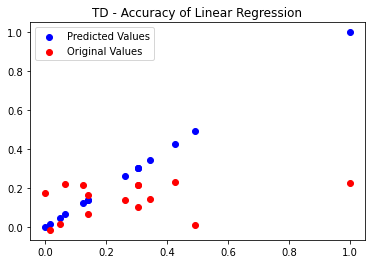

In [202]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.2535393690060317    Root Mean Squared Error = 0.2822820349754406


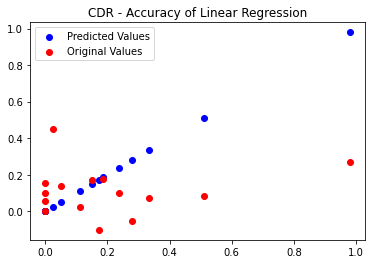

In [203]:
linearRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.07658669531666296    Root Mean Squared Error = 0.25394074173641473


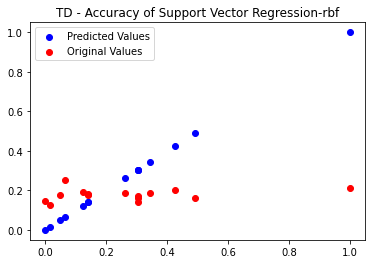

R-Squared Value = -0.35263549950476114    Root Mean Squared Error = 0.28464153328136826


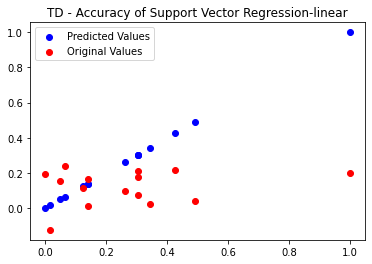

In [204]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.16455641994479642    Root Mean Squared Error = 0.27207868349808145


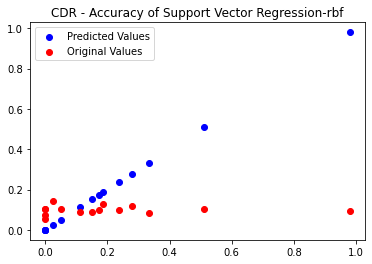

R-Squared Value = -0.1221230038968355    Root Mean Squared Error = 0.26707576644347736


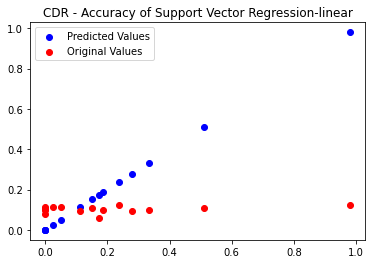

In [205]:
svrRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.5112615531870346    Root Mean Squared Error = 0.30086917595682483


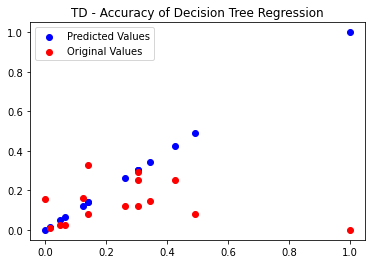

In [206]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.12150757783825572    Root Mean Squared Error = 0.26700251782083956


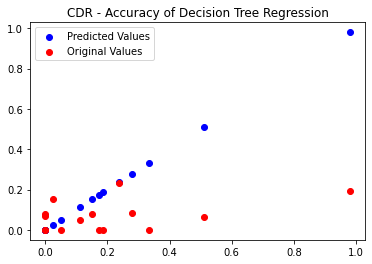

In [207]:
decisionTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.18854060689751417    Root Mean Squared Error = 0.2668178569544247


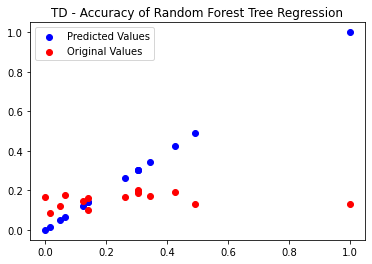

In [208]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.05101676969007363    Root Mean Squared Error = 0.25847531504491733


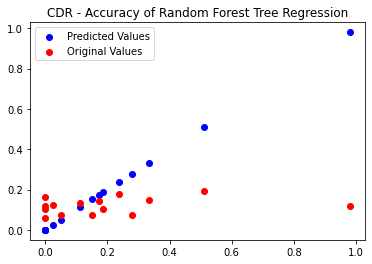

In [209]:
randomDecTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.4871772319255998    Root Mean Squared Error = 0.2984621365383263


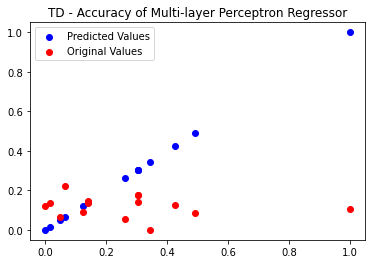

In [210]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.22435327148884188    Root Mean Squared Error = 0.2789765014141509


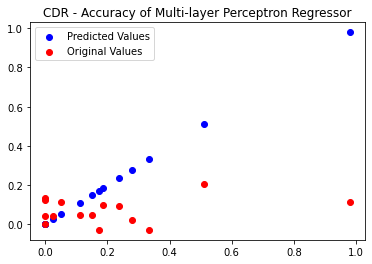

In [211]:
mlpRegressor(X2_train,y2_train,X2_test,y2_test,"CDR")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [212]:
#split data into train and test data
y1 = new_data["TD"].values.reshape((-1,1))
y2=new_data["CDR"].values.reshape((-1,1))
X = data_external.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state = 53)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state = 53)


R-Squared Value = -0.4331628534217624    Root Mean Squared Error = 0.2929919249634493


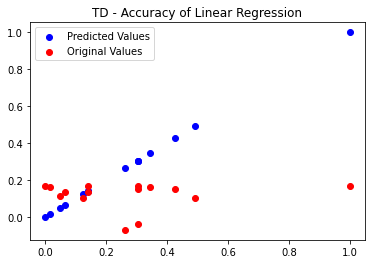

In [213]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.29877407933861866    Root Mean Squared Error = 0.2873300555429504


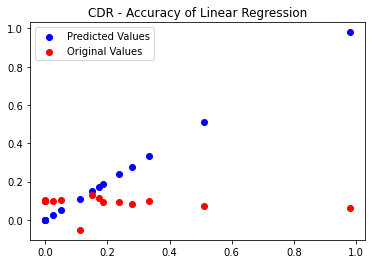

In [214]:
linearRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.45281551449179935    Root Mean Squared Error = 0.2949939533353097


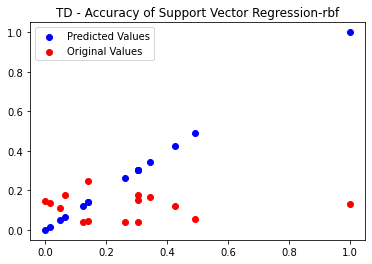

R-Squared Value = -0.3170558678590276    Root Mean Squared Error = 0.28087299055485854


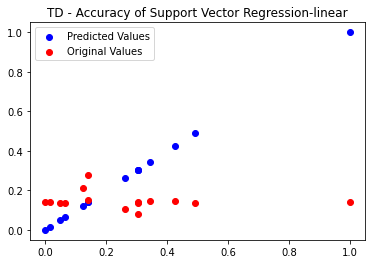

In [215]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.05742000726843277    Root Mean Squared Error = 0.2592614897703499


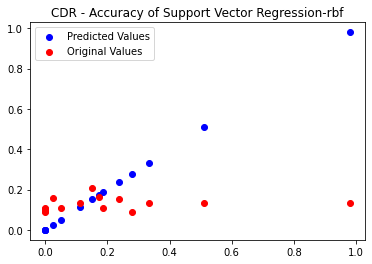

R-Squared Value = -0.10105796501066244    Root Mean Squared Error = 0.2645570517029422


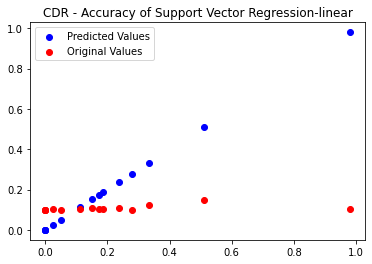

In [216]:
svrRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.7371656181142008    Root Mean Squared Error = 0.32257335573307827


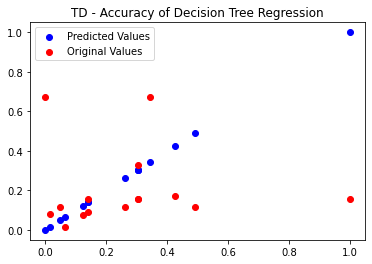

In [217]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.49827719657436775    Root Mean Squared Error = 0.3086102422213462


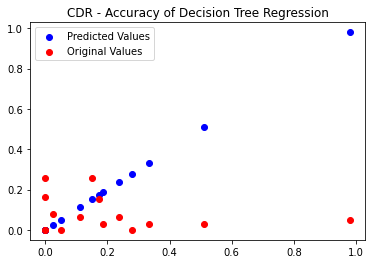

In [218]:
decisionTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.12283691062544255    Root Mean Squared Error = 0.25933803739256533


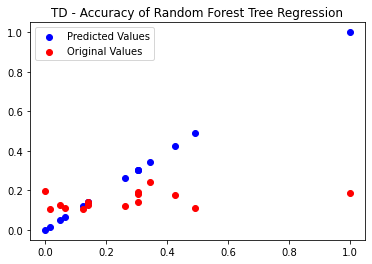

In [219]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.26333860652667807    Root Mean Squared Error = 0.28338322249338543


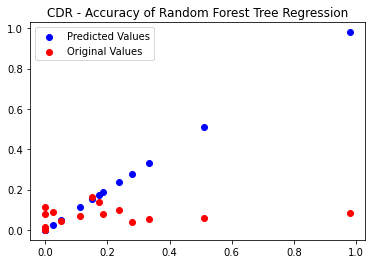

In [220]:
randomDecTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.1905169499496393    Root Mean Squared Error = 0.2670396014132049


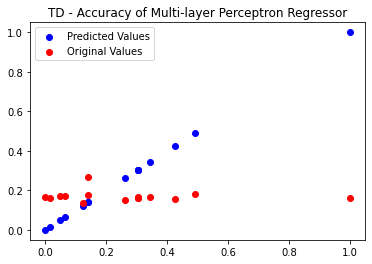

In [221]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.17331247765522573    Root Mean Squared Error = 0.2730996195799929


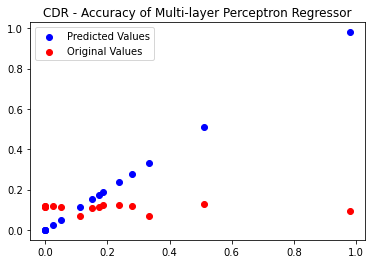

In [222]:
mlpRegressor(X2_train,y2_train,X2_test,y2_test,"CDR")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [223]:
#split data into train and test data
y1 = new_data["TD"].values.reshape((-1,1))
y2=new_data["CDR"].values.reshape((-1,1))
X = data_internal_and_external.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state = 53)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state = 53)

R-Squared Value = -0.003633279100097697    Root Mean Squared Error = 0.24518585195724793


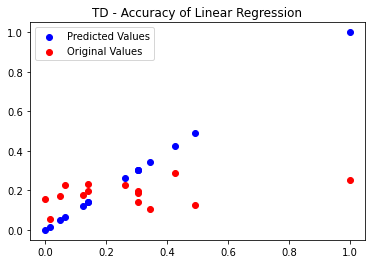

In [224]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -2.0091415912957973    Root Mean Squared Error = 0.43735647669844624


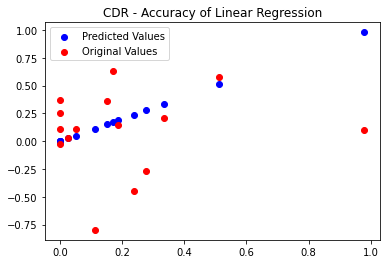

In [225]:
linearRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.09720921648004133    Root Mean Squared Error = 0.2563613813817412


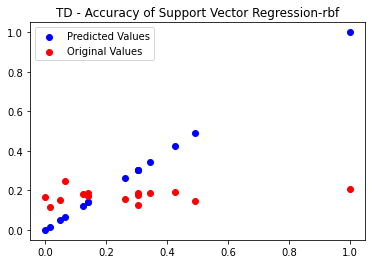

R-Squared Value = -0.36281172246930415    Root Mean Squared Error = 0.28571024254777544


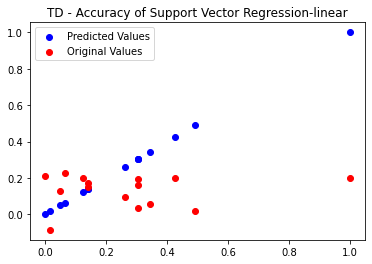

In [226]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.23945919966775864    Root Mean Squared Error = 0.2806922153718834


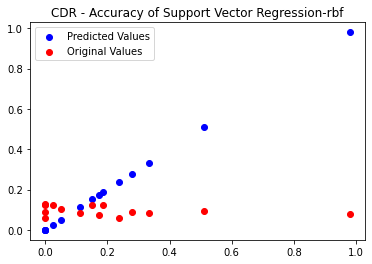

R-Squared Value = -0.1605709781449538    Root Mean Squared Error = 0.2716127193456504


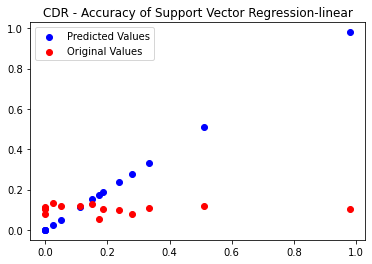

In [227]:
svrRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.2556706581453083    Root Mean Squared Error = 0.2742494419820825


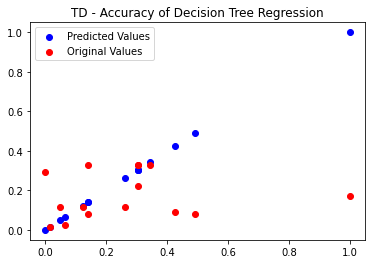

In [228]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.05417378556625985    Root Mean Squared Error = 0.25886322456148736


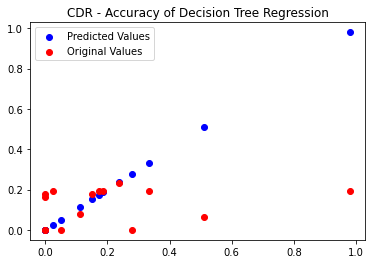

In [229]:
decisionTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = 0.05362640457840229    Root Mean Squared Error = 0.23808892103315416


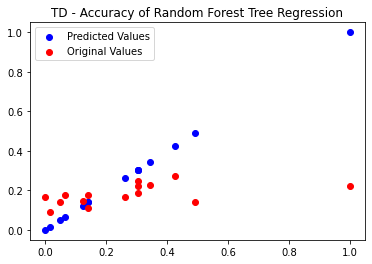

In [230]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = 0.01479470371704672    Root Mean Squared Error = 0.2502520360002964


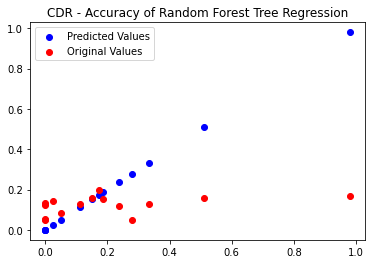

In [231]:
randomDecTreeRegression(X2_train,y2_train,X2_test,y2_test,"CDR")

R-Squared Value = -0.09356621979107338    Root Mean Squared Error = 0.2559354370169163


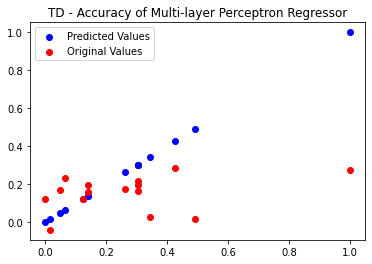

In [232]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(X1_train,y1_train,X1_test,y1_test,"TD")

R-Squared Value = -0.4772927050595701    Root Mean Squared Error = 0.3064414630972095


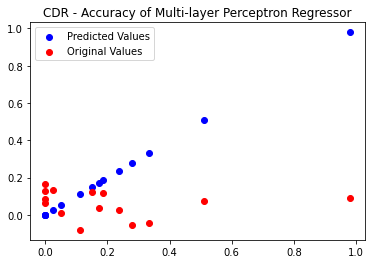

In [233]:
mlpRegressor(X2_train,y2_train,X2_test,y2_test,"CDR")